<a href="https://colab.research.google.com/github/vannguyenhoai43-hash/ecommerce-category-growth-analysis/blob/main/notebooks/04_quality_growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PHẦN 4: CHẤT LƯỢNG TĂNG TRƯỞNG:**

Để đánh giá chất lượng tăng trưởng của các ngành hàng, phân tích không chỉ dựa vào mức tăng tuyệt đối mà còn kết hợp với tỷ trọng ADO/GMV đóng góp trong tổng quy mô toàn ngành.

**Bước 1: Tính tỷ trọng ADO/GMV**

    Với mỗi ngành hàng, tính:

    ado_share = ADO ngành hàng / Tổng ADO tháng

    gmv_share = GMV ngành hàng / Tổng GMV tháng

=> Chỉ số này phản ánh mức độ quan trọng của ngành hàng trong toàn bộ quy mô.

**Bước 2: Xác định ngưỡng phân vị 70%**

    Tính phân vị thứ 70 (70th percentile):

    q_share_ado, q_share_gmv : ngưỡng tỷ trọng cao

    q_diff_ado, q_diff_gmv : ngưỡng tăng trưởng cao

=> Việc sử dụng phân vị giúp xác định nhóm ngành có mức tăng trưởng và tỷ trọng vượt trội so với mặt bằng chung.

**Bước 3: Phân loại chất lượng tăng trưởng**

Kết hợp giữa mức tăng trưởng tuyệt đối (diff_ado, diff_gmv) và tỷ trọng (share_ado, share_gmv), các ngành hàng được chia thành 3 nhóm:

**Nhóm 1: Tăng trưởng mạnh và có quy mô lớn**

Điều kiện:

    diff_ado ≥ q_diff_ado

    share_ado ≥ q_share_ado

Đây là nhóm ngành chủ lực, vừa tăng trưởng cao vừa có đóng góp lớn vào tổng quy mô. Tăng trưởng chất lượng cao, mang tính dẫn dắt thị trường.

**Nhóm 2: Tăng trưởng cao nhưng quy mô còn nhỏ**

Điều kiện:

    diff_ado ≥ q_diff_ado

    share_ado < q_share_ado

Đây là nhóm ngành tiềm năng, tăng trưởng tốt nhưng tỷ trọng còn thấp. Có thể là cơ hội mở rộng và đầu tư thêm nguồn lực.

**Nhóm 3: Suy giảm nhưng quy mô lớn**

Điều kiện:

    diff_ado < q_diff_ado

    share_ado ≥ q_share_ado

Nhóm ngành có tỷ trọng lớn nhưng tăng trưởng kém hoặc suy giảm.


=> Cách tiếp cận này giúp **đánh giá tăng trưởng theo cả hai chiều: tỷ trọng ADO/GMV và động lực tăng trưởng,** từ đó xác định đâu là tăng trưởng thực sự chất lượng và bền vững.


## Import Data:

In [ ]:
!git clone -q https://github.com/vannguyenhoai43-hash/ecommerce-category-growth-analysis.git

fatal: destination path 'ecommerce-category-growth-analysis' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append("/content/ecommerce-category-growth-analysis/src")

from load_data import load_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# DF theo level 2 với cur_month = 20024-09
df_cur_lv2= load_data(month='2024-09')['cur_lv2']

In [ ]:
# DF theo level 2
df_source_lv2= load_data(month='2024-09')['source_lv2']

## Triển khai

In [ ]:
## Tính tỷ trọng
total_share= df_source_lv2.copy()
#Total share ado
total_share['total_ado_share']= (
    df_source_lv2
    .groupby(['year_month','level1_kpi_category'])['ADO_M']
    .transform('sum')
    )
total_share
#Total share gmv
total_share['total_gmv_share']= (
    df_source_lv2
    .groupby(['year_month','level1_kpi_category'])['AdGMV_M']
    .transform('sum')
    )
#ADO_share
total_share['ado_share'] = total_share['ADO_M']/total_share['total_ado_share']
total_share['gmv_share'] = total_share['AdGMV_M']/total_share['total_gmv_share']
total_share.head(5)

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share
0,2024-07,Home & Technical Supplies,Support Supplies,2888.468806,13209.874648,NaN,NaN,14404.819563,92790.688823,0.200521,0.142362
1,2024-08,Home & Technical Supplies,Support Supplies,2872.658502,13143.337034,2888.468806,13209.874648,14529.022784,95825.641870,0.197719,0.137159
2,2024-09,Home & Technical Supplies,Support Supplies,3373.615984,15558.736710,2872.658502,13143.337034,15099.169643,107792.143755,0.223431,0.144340
3,2024-07,Vehicle Essentials,Mechanical Parts,942.304522,5881.293915,NaN,NaN,28612.853177,162052.383981,0.032933,0.036293
4,2024-08,Vehicle Essentials,Mechanical Parts,1017.154352,6403.356208,942.304522,5881.293915,30782.390456,174524.614914,0.033043,0.036690


In [ ]:
total_share_cur = total_share[total_share['year_month']=='2024-09']
total_share_cur.sort_values(['level1_kpi_category','ado_share'],ascending = [True,False]).head(5)

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share
39,2024-09,Home & Technical Supplies,Heavy-duty Equipment,3857.005408,34831.208751,4016.932791,33454.748639,15099.169643,107792.143755,0.255445,0.323133
2,2024-09,Home & Technical Supplies,Support Supplies,3373.615984,15558.736710,2872.658502,13143.337034,15099.169643,107792.143755,0.223431,0.144340
30,2024-09,Home & Technical Supplies,Manual Tools,3370.196077,24683.793652,3381.508214,21010.957324,15099.169643,107792.143755,0.223204,0.228994
24,2024-09,Home & Technical Supplies,Electrical Components,2512.021190,14410.881609,2536.234416,13360.015798,15099.169643,107792.143755,0.166368,0.133691
20,2024-09,Home & Technical Supplies,Construction Materials,1529.075623,15665.037605,1238.733533,11948.112695,15099.169643,107792.143755,0.101269,0.145326


In [ ]:
# Tăng trưởng theo level 1 + level 2
from metrics import growth_by_mul_level
l1_L2_growth = growth_by_mul_level(df_cur_lv2, ['level2_kpi_category', 'level1_kpi_category'])
l1_L2_growth_sort = l1_L2_growth.sort_values('level1_kpi_category')
l1_L2_growth_sort.head(5)

,diff_ado,diff_gmv,grow_ado,grow_gmv,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1,level2_kpi_category,level1_kpi_category
0,290.342090,3716.924910,0.234386,0.311089,1529.075623,1238.733533,15665.037605,11948.112695,Construction Materials,Home & Technical Supplies
1,-24.213226,1050.865811,-0.009547,0.078658,2512.021190,2536.234416,14410.881609,13360.015798,Electrical Components,Home & Technical Supplies
2,-159.927383,1376.460112,-0.039813,0.041144,3857.005408,4016.932791,34831.208751,33454.748639,Heavy-duty Equipment,Home & Technical Supplies
13,500.957482,2415.399676,0.174388,0.183774,3373.615984,2872.658502,15558.736710,13143.337034,Support Supplies,Home & Technical Supplies
5,-11.312137,3672.836328,-0.003345,0.174806,3370.196077,3381.508214,24683.793652,21010.957324,Manual Tools,Home & Technical Supplies


In [ ]:
## Gộp với bảng tăng trưởng (có diff_ado/gmv)
import pandas as pd

df_merge_share = pd.merge(
    total_share_cur,
    l1_L2_growth[['level2_kpi_category','diff_ado','diff_gmv','grow_ado','grow_gmv']],
    on = 'level2_kpi_category',
    how = 'left'

)
df_merge_share.head(5)

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share,diff_ado,diff_gmv,grow_ado,grow_gmv
0,2024-09,Home & Technical Supplies,Support Supplies,3373.615984,15558.736710,2872.658502,13143.337034,15099.169643,107792.143755,0.223431,0.144340,500.957482,2415.399676,0.174388,0.183774
1,2024-09,Vehicle Essentials,Mechanical Parts,1257.305894,7570.014491,1017.154352,6403.356208,31641.407527,178283.670125,0.039736,0.042461,240.151542,1166.658283,0.236101,0.182195
2,2024-09,Vehicle Essentials,Vehicle Maintenance,1909.389789,9656.522330,1828.894378,10262.582355,31641.407527,178283.670125,0.060345,0.054164,80.495411,-606.060025,0.044013,-0.059055
3,2024-09,Vehicle Essentials,Maintenance Fluids,712.234388,4632.230317,804.932960,5937.830016,31641.407527,178283.670125,0.022510,0.025982,-92.698572,-1305.599699,-0.115163,-0.219878
4,2024-09,Vehicle Essentials,Mobility Accessories,1620.329208,6667.651448,1563.389860,7742.379013,31641.407527,178283.670125,0.051209,0.037399,56.939348,-1074.727565,0.036420,-0.138811


## Kết quả



 ## CHẤT LƯỢNG TĂNG TRƯỞNG



 ### Ngành hàng cấp 2 có tỷ trọng lớn và tăng trưởng tốt

**Vehicle Essentials**
- **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là  **Safety Gear** (chiếm 11.58% cơ cấu ADO và tăng trưởng +12.61% MoM ),  **In-car Utilities** (chiếm 6.60% cơ cấu ADO và tăng trưởng +20.79% MoM ).
- **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **In-car Utilities**(chiếm 10.53% cơ cấu GMV và tăng trưởng +19.69% MoM ).

**Home & Technical Supplies**
- **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là  **Support Supplies** (chiếm 22.34% cơ cấu ADO và tăng trưởng +17.44% MoM ).
- **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Manual Tools**(chiếm 22.90% cơ cấu GMV và tăng trưởng +17.48% MoM ).



 ### Ngành hàng cấp 2 tỷ trọng nhỏ nhưng tăng trưởng tốt

**Vehicle Essentials**
- **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Mechanical Parts** (chiếm 3.97% cơ cấu ADO và tăng trưởng +23.61% MoM ), **Vehicle Add-ons** (chiếm 4.19% cơ cấu ADO và tăng trưởng +28.09% MoM ).
- **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Personal Mobility** (chiếm 9.63% cơ cấu GMV và tăng trưởng +42.02% MoM ), **Vehicle Add-ons** (chiếm 4.66% cơ cấu GMV và tăng trưởng +33.53% MoM ).

**Home & Technical Supplies**
- **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Construction Materials** (chiếm 10.13% cơ cấu ADO và tăng trưởng +23.44% MoM ).
- **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Construction Materials** (chiếm 14.53% cơ cấu GMV và tăng trưởng +31.11% MoM ).

**Vehicle Essentials**
- **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Riding Accessories** (chiếm 22.19% cơ cấu ADO nhưng -3.81% MoM ), **Repair Components** (chiếm 37.62% cơ cấu ADO nhưng -1.79% MoM ).
- **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Riding Accessories** (chiếm 12.17% cơ cấu GMV nhưng -12.40% MoM ), **Repair Components** (chiếm 36.08% cơ cấu GMV nhưng -4.27% MoM ).

**Home & Technical Supplies**
- **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Heavy-duty Equipment** (chiếm 25.54% cơ cấu ADO nhưng -3.98% MoM ).
- **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Heavy-duty Equipment** (chiếm 32.31% cơ cấu GMV nhưng +4.11% MoM ).



 ### Tỷ trọng ADO/GMV qua các tháng

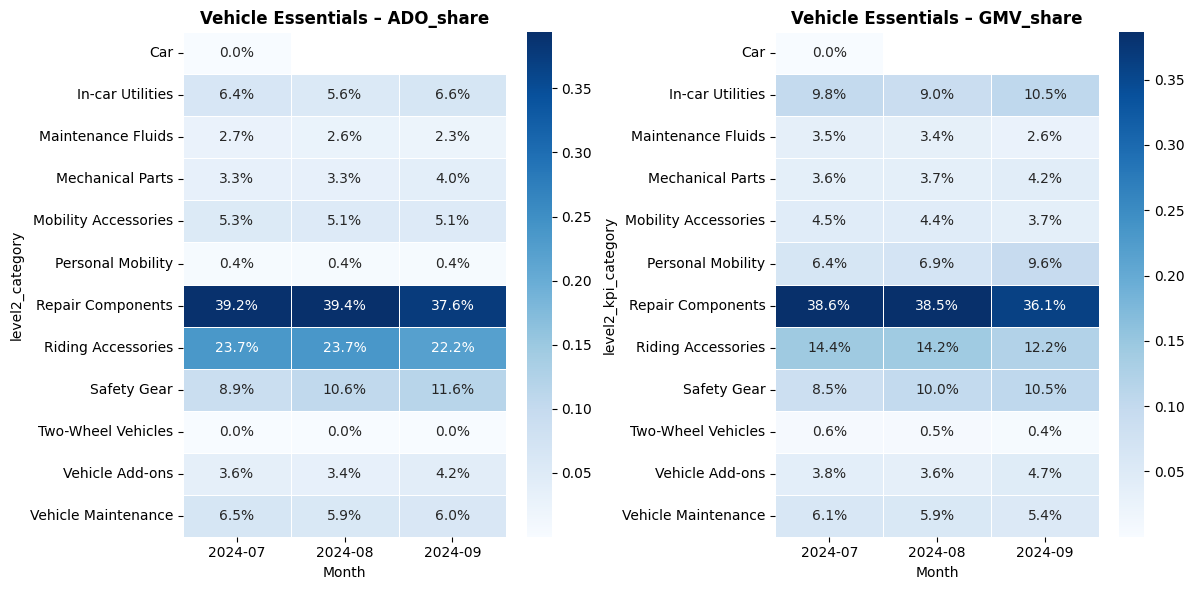

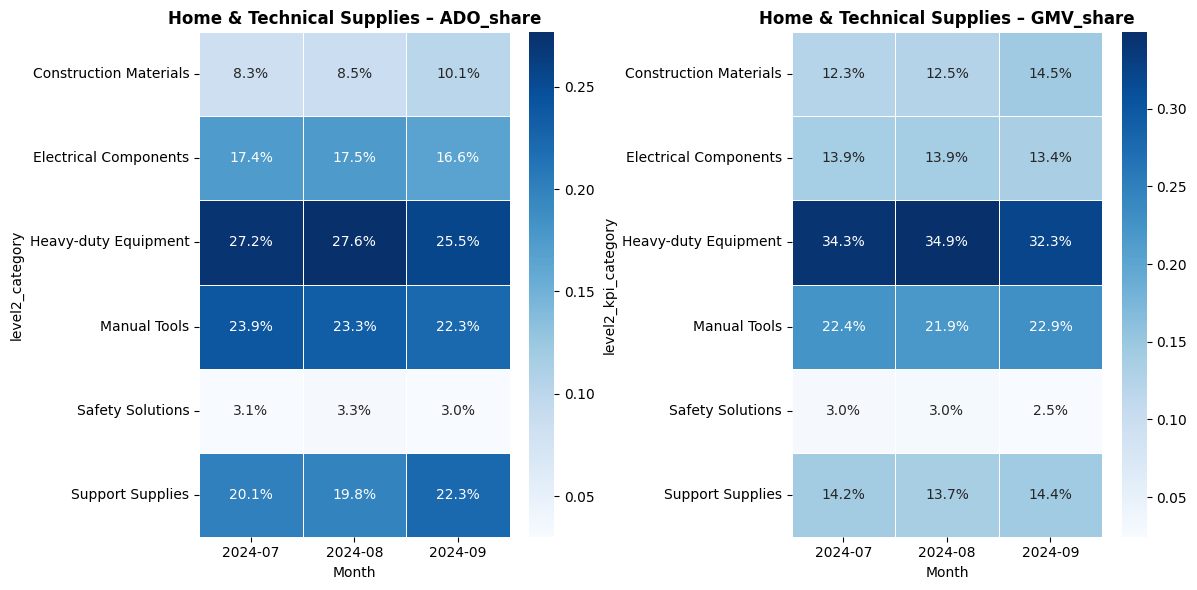

In [ ]:
from IPython.display import Markdown, display
from metrics import quantile_share_diff
from metrics import quantile_share_diff_2
from metrics import quantile_share_diff_3
from charts import plot_heatmap_share


display(Markdown("\n\n ## CHẤT LƯỢNG TĂNG TRƯỞNG"))
display(Markdown("\n\n ### Ngành hàng cấp 2 có tỷ trọng lớn và tăng trưởng tốt"))
insight_text_1 = quantile_share_diff(df_merge_share,'Vehicle Essentials')
insight_text_2 = quantile_share_diff(df_merge_share,'Home & Technical Supplies')
display(Markdown("\n".join(insight_text_1)))
display(Markdown("\n".join(insight_text_2)))
display(Markdown("\n\n ### Ngành hàng cấp 2 tỷ trọng nhỏ nhưng tăng trưởng tốt"))
insight_text_3 = quantile_share_diff_2(df_merge_share,'Vehicle Essentials')
insight_text_4 = quantile_share_diff_2(df_merge_share,'Home & Technical Supplies')
display(Markdown("\n".join(insight_text_3)))
display(Markdown("\n".join(insight_text_4)))
insight_text_5 = quantile_share_diff_3(df_merge_share,'Vehicle Essentials')
insight_text_6 = quantile_share_diff_3(df_merge_share,'Home & Technical Supplies')
display(Markdown("\n".join(insight_text_5)))
display(Markdown("\n".join(insight_text_6)))

# Chart
display(Markdown("\n\n ### Tỷ trọng ADO/GMV qua các tháng"))
plot_heatmap_share(total_share,lv1='Vehicle Essentials')
plot_heatmap_share(total_share,lv1='Home & Technical Supplies')